In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
file_path = "C:/Users/User/Downloads/diabetes (2).csv"
data = pd.read_csv(file_path)
print("Dataset Preview:")
print(data.head())
X = data.drop('Outcome', axis=1)  
y = data['Outcome']              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTrain and Test Set Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("\nScaled Feature Matrix (First 5 rows of X_train):")
print(X_train[:5])


Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Train and Test Set Shapes:
X_train: (614, 8), X_test: (154, 8)
y_train: (614,), y_test: (154,)

Scaled Feature Matrix (First 5 rows of X_train):
[[-0.85135507 -0.98013068 -0.40478372 -0.55397256 -0.33131928 -0.60767846
   0.31079384 -0.79216928]
 [ 0.35657564  0.16144422  0.46536842  

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Original Class Distribution:")
print(y_train.value_counts())

print("\nResampled Class Distribution:")
print(y_train_resampled.value_counts())
print("\nResampled Dataset Shapes:")
print(f"X_train_resampled: {X_train_resampled.shape}")
print(f"y_train_resampled: {y_train_resampled.shape}")


Original Class Distribution:
Outcome
0    400
1    214
Name: count, dtype: int64

Resampled Class Distribution:
Outcome
0    400
1    400
Name: count, dtype: int64

Resampled Dataset Shapes:
X_train_resampled: (800, 8)
y_train_resampled: (800,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       100
           1       0.60      0.72      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the XGBoost classifier without the deprecated parameter
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Fit the model to the resampled training data
xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Print accuracy and classification report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy from Grid Search:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Best Accuracy from Grid Search: 0.8162499999999999


In [13]:
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, "disease_prediction_model.pkl")


['disease_prediction_model.pkl']

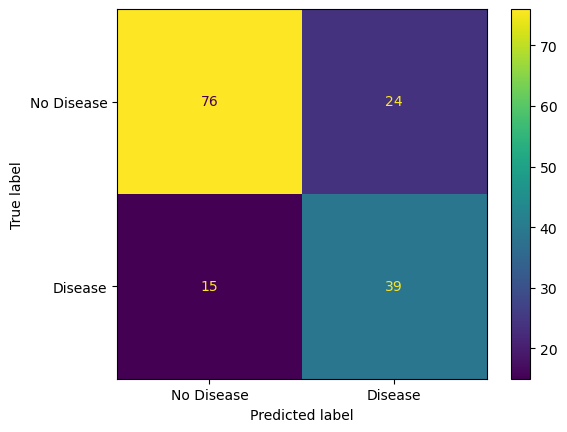

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, display_labels=['No Disease', 'Disease'], cmap='viridis')

# Show the plot
plt.show()


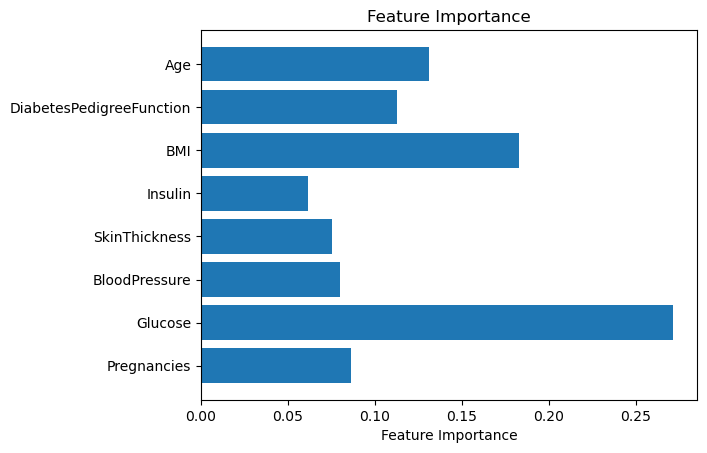

In [16]:
import matplotlib.pyplot as plt

feature_importances = grid_search.best_estimator_.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.show()
